In [1]:
from pykrx import stock
import pandas as pd
pd.DataFrame(stock.get_index_ohlcv_by_date('2022-06-01','2022-06-30','1001')).reset_index()

코스피,날짜,시가,고가,저가,종가,거래량,거래대금,상장시가총액
0,2022-06-02,2670.74,2674.00,2653.59,2658.99,525259148,7860485371460,2092789270563649
1,2022-06-03,2679.57,2681.51,2663.00,2670.65,562469813,7566757988438,2101703361724826
2,2022-06-07,2659.27,2662.04,2622.78,2626.34,524710380,8948923639761,2067165430942135
3,2022-06-08,2633.53,2639.52,2621.96,2626.15,576389702,7964335124403,2066742737105469
4,2022-06-09,2618.92,2627.88,2606.61,2625.44,814882844,10857975089630,2066451297057888
5,2022-06-10,2596.37,2602.80,2583.74,2595.87,724089803,8285964062392,2043213222024130
6,2022-06-13,2550.21,2550.32,2504.51,2504.51,660309279,10335873891430,1972203677735303
7,2022-06-14,2472.96,2503.17,2457.39,2492.97,671756827,9992819780261,1962993357171067
8,2022-06-15,2490.01,2495.54,2436.04,2447.38,714143493,9936928113647,1926857817400711
9,2022-06-16,2481.66,2500.36,2447.33,2451.41,584041265,9588186586438,1931070977616452


In [76]:
temp1 = pd.DataFrame(stock.get_index_ohlcv_by_date('2022-06-01','2022-06-30','1001')).reset_index().loc[:,['날짜','시가']]
temp1.info()
temp1['날짜'] = [str(i).split()[0] for i in temp1['날짜']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      20 non-null     datetime64[ns]
 1   시가      20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


In [31]:
temp2 = pd.read_csv('./2022-06_score.csv')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      30 non-null     object 
 1   score   30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [32]:
tp = temp2.merge(temp1,how='outer',on='날짜')
tp = tp.fillna(temp1['시가'].mean())

In [73]:
#tp['시가'].plot()

In [74]:
#tp['score'].plot()

In [39]:
temp1 = stock.get_market_ohlcv_by_date('2022-06-01','2022-06-30','229720').reset_index().loc[:,['날짜','시가']]
temp1['날짜'] = [str(i).split()[0] for i in temp1['날짜']]
tp = temp2.merge(temp1,how='outer',on='날짜')
tp = tp.fillna(temp1['시가'].mean())

In [75]:
#tp['시가'].plot()

In [40]:
tp

,날짜,score,거래회전율,환율,fg_score,시가
0,2022-06-01,38.918779,16935.250000,16935.250000,38.918779,16935.25
1,2022-06-02,28.718668,19.924295,43.600000,30.747654,18160.00
2,2022-06-03,32.634572,0.000000,41.466667,24.700413,18165.00
3,2022-06-04,40.270144,16935.250000,16935.250000,40.270144,16935.25
4,2022-06-05,37.634442,16935.250000,16935.250000,37.634442,16935.25
5,2022-06-06,40.367536,16935.250000,16935.250000,40.367536,16935.25
6,2022-06-07,35.700046,23.520303,43.150000,34.123450,18045.00
7,2022-06-08,35.611877,10.349277,40.483333,28.814829,17800.00
8,2022-06-09,36.226128,34.377151,40.766667,37.123315,17755.00
9,2022-06-10,38.819116,25.636614,40.400000,34.951910,17665.00


In [38]:
temp2 = pd.read_csv('./final.csv').drop('Unnamed: 0',axis=1)
temp2

,날짜,score,거래회전율,환율,fg_score
0,2022-06-01,38.918779,NaN,NaN,38.918779
1,2022-06-02,28.718668,19.924295,43.600000,30.747654
2,2022-06-03,32.634572,0.000000,41.466667,24.700413
3,2022-06-04,40.270144,NaN,NaN,40.270144
4,2022-06-05,37.634442,NaN,NaN,37.634442
5,2022-06-06,40.367536,NaN,NaN,40.367536
6,2022-06-07,35.700046,23.520303,43.150000,34.123450
7,2022-06-08,35.611877,10.349277,40.483333,28.814829
8,2022-06-09,36.226128,34.377151,40.766667,37.123315
9,2022-06-10,38.819116,25.636614,40.400000,34.951910


<AxesSubplot:>

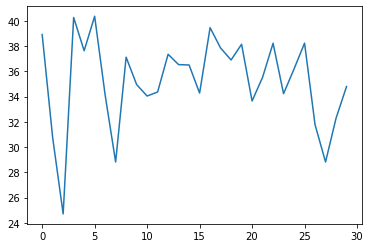

In [21]:
temp2['fg_score'].plot()

<AxesSubplot:>

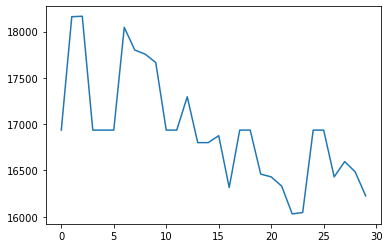

In [41]:
tp['시가'].plot() # ktop30 fillna : mean


<AxesSubplot:>

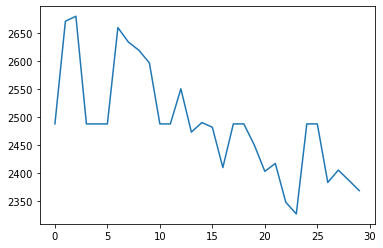

In [33]:
tp['시가'].plot() # kospi fillna : mean

도미넌스가 큰기업이 상당수 분포해서 kospi와 매우 유사하고, score는 반대경향을 보인다.

가격이 떨어지는것을 매수타이밍으로 인식함을 보여준다.


---

In [59]:
samsung_df = stock.get_market_trading_volume_by_date('2022-06-01','2022-06-30','005930').reset_index()
samsung_df['날짜'] = [str(i).split()[0] for i in samsung_df['날짜']]
samsung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      20 non-null     object
 1   기관합계    20 non-null     int64 
 2   기타법인    20 non-null     int64 
 3   개인      20 non-null     int64 
 4   외국인합계   20 non-null     int64 
 5   전체      20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [68]:
tp01 = pd.read_csv('./final.csv').drop('Unnamed: 0',axis=1)
tp01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        30 non-null     object 
 1   score     30 non-null     float64
 2   거래회전율     20 non-null     float64
 3   환율        20 non-null     float64
 4   fg_score  30 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [69]:
tp01 = tp01.merge(samsung_df,how='outer',on='날짜')
tp01

,날짜,score,거래회전율,환율,fg_score,기관합계,기타법인,개인,외국인합계,전체
0,2022-06-01,38.918779,NaN,NaN,38.918779,NaN,NaN,NaN,NaN,NaN
1,2022-06-02,28.718668,19.924295,43.600000,30.747654,-3211366.0,141287.0,3617723.0,-547644.0,0.0
2,2022-06-03,32.634572,0.000000,41.466667,24.700413,855933.0,-7021.0,-354907.0,-494005.0,0.0
3,2022-06-04,40.270144,NaN,NaN,40.270144,NaN,NaN,NaN,NaN,NaN
4,2022-06-05,37.634442,NaN,NaN,37.634442,NaN,NaN,NaN,NaN,NaN
5,2022-06-06,40.367536,NaN,NaN,40.367536,NaN,NaN,NaN,NaN,NaN
6,2022-06-07,35.700046,23.520303,43.150000,34.123450,-3831242.0,79348.0,7873193.0,-4121299.0,0.0
7,2022-06-08,35.611877,10.349277,40.483333,28.814829,-394294.0,26328.0,3436553.0,-3068587.0,0.0
8,2022-06-09,36.226128,34.377151,40.766667,37.123315,448925.0,97635.0,5858885.0,-6405445.0,0.0
9,2022-06-10,38.819116,25.636614,40.400000,34.951910,-1133682.0,-31101.0,10428214.0,-9263431.0,0.0


<AxesSubplot:xlabel='날짜'>

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


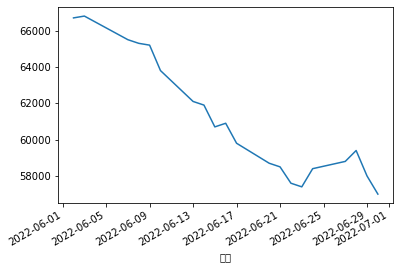

In [71]:
tp_plot = stock.get_market_ohlcv_by_date('2022-06-01','2022-06-30','005930')
tp_plot['종가'].plot()

6월은 전체적으로 개인투자자의 매수량이 많고 가격이 하락한다. (삼성전자)

fg_score가 전반적으로 공포구간에 존재한다.